## Analítica de Tickets OTRS

In [22]:
from wordcloud import WordCloud, STOPWORDS 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import mysql.connector
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

#### Conexión directa al MySQL del OTRS

In [2]:
otrs_user = 'usr_tronexotrs'
otrs_pass = 'usr$otrs#56aN7Rt*mp1'

In [3]:
cnx = mysql.connector.connect(user=otrs_user, password=otrs_pass,
                              host='pantermysql.cwqmr5tsjjh9.us-west-2.rds.amazonaws.com',
                              database='tronex.otrs')

In [10]:
query = ('SELECT T.title, S.* FROM `tronex.otrs`.itv_sabana_tickets AS S INNER JOIN `tronex.otrs`.ticket AS T \
         ON S.ticket_id = T.id WHERE cola = "SERVICIOS IT" AND \
         correo_cliente NOT IN ("soporte@sasaconsultoria.com", "telefonia@tronex.com"\
         , "serviciosit@tronex.com") AND T.title not like "%has low free space" \
        AND agente in ("JAIME ALBERTO GONZALEZ", "ROBINSON CASTRO", "RODOLFO LEON VELEZ")\
        AND estado_ticket <> "merged"')

df = pd.read_sql(query, con=cnx)

In [14]:
pd.to_datetime(df[pd.to_datetime(df['fecha_creacion']).dt.year == 2019]['fecha_creacion']).dt.month.unique()

array([12, 11, 10,  9,  8,  7,  6,  5])

In [25]:
datetime.now().month

5

In [53]:
df['link'] = 'http://servicios.tronex.com/otrs/index.pl?Action=AgentTicketZoom;TicketID='+\
df['ticket_id'].astype(str)
df[['link', 'ticket_numero']].apply(lambda x: '[{}]({})'.format(x[0], x[1]), axis=1)[0]

'[http://servicios.tronex.com/otrs/index.pl?Action=AgentTicketZoom;TicketID=69703](2020123006000177)'

In [22]:
df[['ticket_id', 'ticket_numero']]

,ticket_id,ticket_numero
0,69703,2020123006000177
1,69697,2020123006000113
2,69682,2020122906000152
3,69681,2020122906000143
4,69679,2020122906000125
...,...,...
4104,53672,2020010306000659
4105,53666,2020010306000597
4106,53652,2020010306000453
4107,53592,2020010206000133


In [5]:
df.columns

Index(['title', 'ticket_id', 'ticket_numero', 'estado_ticket', 'tipo_estado',
       'tipo_ticket', 'servicio', 'servicio_padre', 'servicio_hijo', 'cola',
       'sla', 'cumple_sla', 'via_de_ingreso', 'primer_contacto', 'reincidente',
       'agente', 'tipo_agente', 'correo_cliente', 'nombre_usuario',
       'nombre_area', 'centro_costo', 'unidad_negocio', 'empresa', 'merged',
       'nuevo_asignado', 'asignado_en_progreso', 'asignado_pendiente',
       'asignado_cerrado', 'asignado_espera', 'nuevo_cerrado',
       'fecha_creacion', 'fecha_cierre', 'anio', 'mes', 'day',
       'clasificacion_de_ticket', '_sin_SCUN', 'ComTipo', 'Clasificacion'],
      dtype='object')

In [6]:
comment_words = '' 
stopwords = set(['con', 'el', 'de', 'la', 'y', 'para', 'por', 'a', 'no', 'del', 'sin', 'not', 'in', 're', 
                 'se', 'rv', 'lo', 'las', 'en']) 
for val in df.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
    tokens = [i.strip() for i in tokens]
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

In [7]:
WC = WordCloud(width=1000, height=600)
WC.process_text(text=comment_words).items()

dict_items([('solsta', 1), ('nota', 3), ('de', 519), ('entrega', 8), ('pvsol', 1), ('la', 77), ('impresora', 207), ('rv', 205), ('solicitud', 221), ('y', 127), ('para', 77), ('asdrubal', 1), ('parra', 1), ('sara', 3), ('montoya', 4), ('cambio', 11), ('clave', 26), ('vpn', 56), ('conectarme', 1), ('ingeniero', 1), ('comercial', 1), ('bucaramanga', 17), ('julián', 1), ('buitrago', 1), ('toner', 11), ('logistica', 6), ('acceso', 193), ('carpeta', 159), ('en', 86), ('red', 32), ('sin', 49), ('imprimir', 15), ('pc', 65), ('ingreso', 89), ('intranet', 10), ('tronex', 41), ('ayuda', 40), ('forticlient', 96), ('laura', 3), ('mena', 1), ('forti', 22), ('ax', 144), ('nuevo', 19), ('desde', 9), ('alberto', 1), ('correo', 74), ('inconveniente', 59), ('facturacion', 5), ('doble', 2), ('diferencia', 3), ('vendedora', 2), ('yisenia', 1), ('alejandra', 5), ('dia', 2), ('diciembre', 2), ('permiso', 70), ('búsqueda', 2), ('cable', 22), ('db9', 1), ('m', 5), ('h', 2), ('error', 74), ('re', 66), ('factura

In [8]:
sorted_frequencies = sorted(
        WC.process_text(text=comment_words).items(), key=lambda x: x[1], reverse=True
    )
frequencies = {
    k: v for k, v in sorted_frequencies[:100] if v >= 15
}
frequencies

{'de': 519,
 'solicitud': 221,
 'impresora': 207,
 'rv': 205,
 'solicitud de': 203,
 'acceso': 193,
 'carpeta': 159,
 'problema': 150,
 'ax': 144,
 'y': 127,
 'problemas con': 117,
 'de recursos': 114,
 'equipo': 110,
 'conexión': 109,
 'forticlient': 96,
 'requerimiento': 95,
 '3cx': 94,
 'cambio de': 90,
 'ingreso': 89,
 'en': 86,
 'la': 77,
 'para': 77,
 'correo': 74,
 'error': 74,
 'novedad': 73,
 'permiso': 70,
 'computador': 69,
 'envió para': 69,
 're': 66,
 'pc': 65,
 'team': 65,
 'codisco': 62,
 'de red': 60,
 'inconveniente': 59,
 'con el': 58,
 'crear cliente': 58,
 'de equipo': 57,
 'vpn': 56,
 'archivo': 55,
 'internet': 55,
 'revisión': 54,
 'conexion': 53,
 'con la': 53,
 'sin': 49,
 'del': 49,
 'wa': 47,
 'pantalla': 46,
 'falla': 46,
 'contraseña': 45,
 'error crear': 45,
 'en la': 45,
 'teclado': 44,
 'la red': 43,
 'productivo zona': 42,
 'zona tipo': 42,
 'tronex': 41,
 'instalación de': 41,
 'tipo facturas': 41,
 'facturas venta': 41,
 'venta documento': 41,
 'ayud

(-0.5, 799.5, 799.5, -0.5)

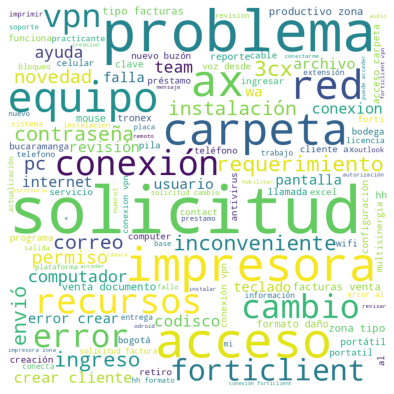

In [9]:
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

### Distribución de los datos

In [10]:
def show_distribution(var_data):

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum: {:,.2f}\nMean: {:,.2f}\nMedian: {:,.2f}\nMode: {:,.2f}\nMaximum: {:,.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data, color='yellowgreen' , edgecolor="#6A9662")
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
#    fig.show()

In [11]:
df1 = pd.Series(pd.to_timedelta(df.loc[df['asignado_cerrado'] != '0', \
                                       'asignado_cerrado'].values).seconds/3600)

Minimum: 0.01
Mean: 5.13
Median: 2.41
Mode: 23.00
Maximum: 24.00



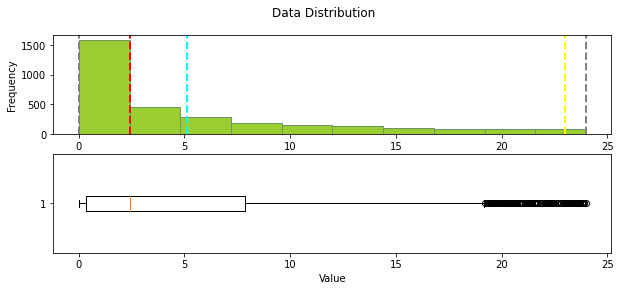

In [12]:
show_distribution(df1[df1<10000])

## Datamining - Reglas de asociación

#### Se analizaron los tickets creados según el campo "servicio"

Después de analizar varios escenarios los siguientes servicios por su alta frecuencia:

* OFIMATICA::EQUIPOS DE COMPUTO
* OFIMATICA::APLICACIONES DE ESCRITORIO

### Se construye una tabla con el conteo de todos los servicios

In [13]:
df.head()

,title,ticket_id,ticket_numero,estado_ticket,tipo_estado,tipo_ticket,servicio,servicio_padre,servicio_hijo,cola,...,nuevo_cerrado,fecha_creacion,fecha_cierre,anio,mes,day,clasificacion_de_ticket,_sin_SCUN,ComTipo,Clasificacion
0,SOLSTA - Nota de Entrega 20232. PVSOL,69703,2020123006000177,CERRADO EXITOSAMENTE,CERRADO,REQUERIMENTO/SOLICITUD,OFIMATICA::APLICACIONES DE ESCRITORIO,OFIMATICA,APLICACIONES DE ESCRITORIO,SERVICIOS IT,...,00:03:29,2020-12-30,2020-12-30,2020,December,30,_SIN CLASIFICACION DE TICKETS,_SIN SCUN,_SIN COMTIPO,_SIN CLASIFICACION
1,Inconvenientes con la impresora,69697,2020123006000113,CERRADO EXITOSAMENTE,CERRADO,REQUERIMENTO/SOLICITUD,IMPRESION ::IMPRESION,IMPRESION,IMPRESION,SERVICIOS IT,...,00:20:10,2020-12-30,2020-12-30,2020,December,30,_SIN CLASIFICACION DE TICKETS,_SIN SCUN,_SIN COMTIPO,_SIN CLASIFICACION
2,RV: Solicitud de equipos y correos para Asdrub...,69682,2020122906000152,CERRADO EXITOSAMENTE,CERRADO,REQUERIMENTO/SOLICITUD,OFIMATICA::SOLICITUD DE RECURSO,OFIMATICA,SOLICITUD DE RECURSO,SERVICIOS IT,...,52:55:20,2020-12-29,2021-01-05,2020,December,29,_SIN CLASIFICACION DE TICKETS,_SIN SCUN,_SIN COMTIPO,_SIN CLASIFICACION
3,Cambio Clave VPN,69681,2020122906000143,CERRADO EXITOSAMENTE,CERRADO,REQUERIMENTO/SOLICITUD,OFIMATICA::APLICACIONES DE ESCRITORIO,OFIMATICA,APLICACIONES DE ESCRITORIO,SERVICIOS IT,...,00:28:18,2020-12-29,2020-12-29,2020,December,29,_SIN CLASIFICACION DE TICKETS,_SIN SCUN,_SIN COMTIPO,_SIN CLASIFICACION
4,Solicitud,69679,2020122906000125,CERRADO EXITOSAMENTE,CERRADO,REQUERIMENTO/SOLICITUD,ERP::ADMINISTRACION,ERP,ADMINISTRACION,SERVICIOS IT,...,01:12:15,2020-12-29,2020-12-29,2020,December,29,_SIN CLASIFICACION DE TICKETS,_SIN SCUN,_SIN COMTIPO,_SIN CLASIFICACION


In [14]:
df['cantidad_servicio'] = 1

df_pivot = df.pivot_table(index='fecha_creacion', \
                          columns='servicio', \
                          aggfunc='sum', \
                          values='cantidad_servicio', \
                          fill_value=0)

df_pivot.drop(columns=['OFIMATICA::EQUIPOS DE COMPUTO', \
                       'OFIMATICA::APLICACIONES DE ESCRITORIO'], \
              inplace=True)

def encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df_pivot = df_pivot.applymap(encode)

In [15]:
df_pivot.head()

servicio,ACCESIBILIDAD::DIRECTORIO ACTIVO,AUTOMATIZACION DE FLOTA Y TRANSPORTE::ADMINISTRACION,AUTOMATIZACION DE LA ADMINISTRACION TI::CABLEADO ESTRUCTURADO,AUTOMATIZACION DE LA ADMINISTRACION TI::GESTION TIC,AUTOMATIZACION DE LA ADMINISTRACION TI::SEGURIDAD DE LA INFORMACIÓN,AUTOMATIZACION DE LA ADMINISTRACION TI::SERVICIOS EN LA NUBE,AUTOMATIZACION FUERZA DE VENTAS,AUTOMATIZACION FUERZA DE VENTAS::ADMINISTRACION,AUTOMATIZACION FUERZA DE VENTAS::CIERRE DE DIA,AUTOMATIZACION FUERZA DE VENTAS::INICIO DE DIA,...,NAVEGACION::POR CABLE,NAVEGACION::WEBSERVICE,OFIMATICA,OFIMATICA::PERIFERICO,OFIMATICA::SOLICITUD DE RECURSO,TELEFONIA,TELEFONIA::TELEFONIA CONMUTADA,TELEFONIA::TELEFONIA IP,TELEFONIA::TELEFONIA MOVIL,_SIN SERVICIO
fecha_creacion,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2020-01-07,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
2020-01-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2020-01-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Tabla con el conteo de todos los servicios

In [68]:
df_pivot.head(10)

servicio,ACCESIBILIDAD::DIRECTORIO ACTIVO,AUTOMATIZACION DE FLOTA Y TRANSPORTE::ADMINISTRACION,AUTOMATIZACION DE LA ADMINISTRACION TI::CABLEADO ESTRUCTURADO,AUTOMATIZACION DE LA ADMINISTRACION TI::GESTION TIC,AUTOMATIZACION DE LA ADMINISTRACION TI::SEGURIDAD DE LA INFORMACIÓN,AUTOMATIZACION DE LA ADMINISTRACION TI::SERVICIOS EN LA NUBE,AUTOMATIZACION FUERZA DE VENTAS,AUTOMATIZACION FUERZA DE VENTAS::ADMINISTRACION,AUTOMATIZACION FUERZA DE VENTAS::CIERRE DE DIA,AUTOMATIZACION FUERZA DE VENTAS::INICIO DE DIA,...,NAVEGACION::POR CABLE,NAVEGACION::WEBSERVICE,OFIMATICA,OFIMATICA::PERIFERICO,OFIMATICA::SOLICITUD DE RECURSO,TELEFONIA,TELEFONIA::TELEFONIA CONMUTADA,TELEFONIA::TELEFONIA IP,TELEFONIA::TELEFONIA MOVIL,_SIN SERVICIO
fecha_creacion,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2020-01-07,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
2020-01-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2020-01-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2020-01-10,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2020-01-11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-13,1,0,0,0,0,0,0,1,1,1,...,0,0,0,1,0,0,0,1,0,0
2020-01-14,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


### Cálculo de las reglas de asociación
---

* Se calculan las reglas de asociación usando una presencia de los datos en un 30% de las muestras `(soporte)`

* El tamaño de la muestra es un día `(no es cada ticket)`

In [69]:
df_freqserv = apriori(df_pivot, min_support=0.3, use_colnames=True)
df_rules = association_rules(df_freqserv, min_threshold=1, metric='lift')

### Cálculo de las reglas de asociación
#### Explicación de variables
---
* El antecedente implica el consecuente, no es conmutativo
* Support: Es la presencia en el dataset del antecedente, el consecuente y la regla en si
* Confidence: Es el porcentaje de los casos en el que la regla es cierta

* Lift: Cuando el valor es 1 son variables independientes, si es mayor son dependientes y si es menor son inversamente dependientes
* Leverage: Es similar al lift pero se calcula diferente y el valor de independencia es 0
* Conviction: es el error que habría en caso de que las variables sean independientes

### Cálculo de las reglas de asociación
---

In [70]:
df_rules.loc[(df_rules.confidence>0.5)].sort_values('confidence', \
                                                    ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(TELEFONIA::TELEFONIA IP),(MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS),0.468310,0.605634,0.341549,0.729323,1.204232,0.057925,1.456964
3,(AUTOMATIZACION FUERZA DE VENTAS::ADMINISTRACION),(MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS),0.507042,0.605634,0.341549,0.673611,1.112242,0.034467,1.208271
9,(OFIMATICA::PERIFERICO),(MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS),0.485915,0.605634,0.323944,0.666667,1.100775,0.029657,1.183099
7,(IMPRESION ::IMPRESION),(MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS),0.507042,0.605634,0.327465,0.645833,1.066376,0.020383,1.113505
5,(OFIMATICA::PERIFERICO),(ERP::ADMINISTRACION),0.485915,0.524648,0.313380,0.644928,1.229258,0.058446,1.338747
0,(AUTOMATIZACION FUERZA DE VENTAS::ADMINISTRACION),(IMPRESION ::IMPRESION),0.507042,0.507042,0.309859,0.611111,1.205247,0.052767,1.267606
1,(IMPRESION ::IMPRESION),(AUTOMATIZACION FUERZA DE VENTAS::ADMINISTRACION),0.507042,0.507042,0.309859,0.611111,1.205247,0.052767,1.267606
4,(ERP::ADMINISTRACION),(OFIMATICA::PERIFERICO),0.524648,0.485915,0.313380,0.597315,1.229258,0.058446,1.276643
2,(MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS),(AUTOMATIZACION FUERZA DE VENTAS::ADMINISTRACION),0.605634,0.507042,0.341549,0.563953,1.112242,0.034467,1.130516
10,(MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS),(TELEFONIA::TELEFONIA IP),0.605634,0.468310,0.341549,0.563953,1.204232,0.057925,1.219343


In [71]:
df_rules['antecedents'] = df_rules['antecedents'].apply(lambda x: set(x))
df_rules['consequents'] = df_rules['consequents'].apply(lambda x: set(x))

In [72]:
df_rules[df_rules['antecedents'] == {'TELEFONIA::TELEFONIA IP'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,{TELEFONIA::TELEFONIA IP},{MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS},0.46831,0.605634,0.341549,0.729323,1.204232,0.057925,1.456964


In [73]:
df['fecha_creacion'].nunique()

284

In [81]:
fechas = df[df['servicio'] == 'TELEFONIA::TELEFONIA IP']['fecha_creacion'].unique()

In [82]:
fechas = df.loc[(df['fecha_creacion'].isin(fechas)) &\
                (df['servicio'] == 'MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS')]['fecha_creacion'].unique()

In [110]:
df_temp = df.loc[(df['fecha_creacion']
        .isin(fechas)) & (df['servicio']
                          .isin(['TELEFONIA::TELEFONIA IP']))]

In [111]:
df_temp['fecha_creacion'] = pd.to_datetime(df_temp['fecha_creacion'])

/Users/afranco/opt/miniconda3/envs/OTRS/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
df_ant = df_temp.set_index('fecha_creacion').groupby([pd.Grouper(freq='D'), 'servicio'])\
        .agg({'title':'count'}).reset_index('servicio')

In [113]:
df_temp = df.loc[(df['fecha_creacion']
        .isin(fechas)) & (df['servicio']
                          .isin(['MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS']))]

In [114]:
df_temp['fecha_creacion'] = pd.to_datetime(df_temp['fecha_creacion'])

/Users/afranco/opt/miniconda3/envs/OTRS/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
df_con = df_temp.set_index('fecha_creacion')\
        .groupby([pd.Grouper(freq='D'), 'servicio']).agg({'title':'count'}).reset_index('servicio')

In [120]:
df_con.sort_values(by='title', ascending=False)

,servicio,title
fecha_creacion,,
2020-10-13,MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS,64
2020-11-03,MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS,6
2020-06-09,MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS,6
2020-10-26,MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS,5
2020-08-04,MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS,5
...,...,...
2020-07-02,MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS,1
2020-07-07,MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS,1
2020-07-30,MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS,1


In [124]:
df_con = df_con.loc[df_con['title'] < 64]

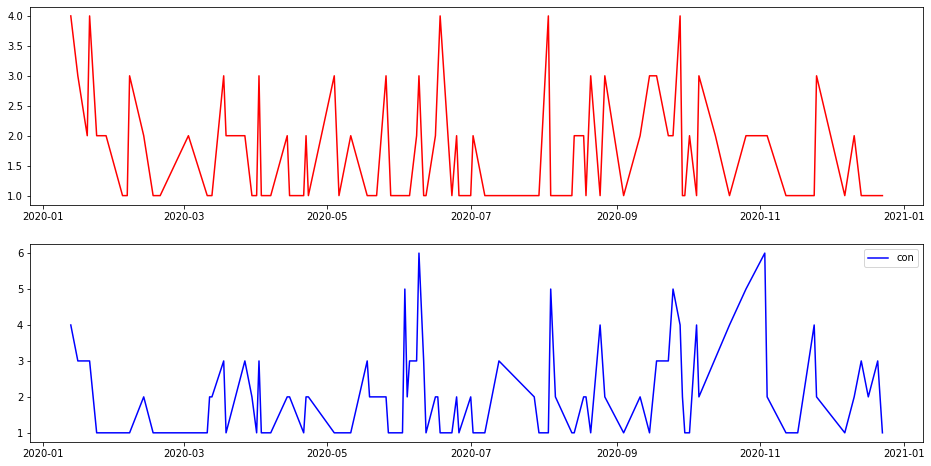

In [137]:
plt.ion()
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(df_ant.index, df_ant.title, label='ant', color='red')
plt.subplot(212)
plt.plot(df_con.index, df_con.title, label='con', color='blue')
plt.legend()
plt.show()

In [83]:
df.loc[(df['fecha_creacion']
        .isin(fechas)) & (df['servicio']
                          .isin(['TELEFONIA::TELEFONIA IP', 'MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS']))]

,title,ticket_id,ticket_numero,estado_ticket,tipo_estado,tipo_ticket,servicio,servicio_padre,servicio_hijo,cola,...,asignado_pendiente,asignado_cerrado,asignado_espera,nuevo_cerrado,fecha_creacion,fecha_cierre,anio,mes,day,cantidad_servicio
25,Permiso de acceso,69603,2020122306000118,CERRADO EXITOSAMENTE,CERRADO,REQUERIMENTO/SOLICITUD,MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS,MENSAJERIA Y COLABORACION,SERVIDOR DE ARCHIVOS,SERVICIOS IT,...,04:11:25,39:08:34,0,40:45:40,2020-12-23,2020-12-28,2020,December,23,1
29,Nuevo buzón de voz - Desde 43114226455 - 43114...,69596,2020122306000047,CERRADO EXITOSAMENTE,CERRADO,REQUERIMENTO/SOLICITUD,TELEFONIA::TELEFONIA IP,TELEFONIA,TELEFONIA IP,SERVICIOS IT,...,0,00:05:04,0,00:16:45,2020-12-23,2020-12-23,2020,December,23,1
33,Permisos en carpeta GESTIÓN POR PROCESOS,69587,2020122206000352,CERRADO EXITOSAMENTE,CERRADO,REQUERIMENTO/SOLICITUD,MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS,MENSAJERIA Y COLABORACION,SERVIDOR DE ARCHIVOS,SERVICIOS IT,...,0,06:24:15,0,07:20:01,2020-12-22,2020-12-23,2020,December,22,1
36,Permiso a Edison Arias,69578,2020122206000263,CERRADO EXITOSAMENTE,CERRADO,REQUERIMENTO/SOLICITUD,MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS,MENSAJERIA Y COLABORACION,SERVIDOR DE ARCHIVOS,SERVICIOS IT,...,0,01:37:55,0,02:41:27,2020-12-22,2020-12-22,2020,December,22,1
38,LINEAS INTERNAS REGIONAL BUCARAMANGA,69572,2020122206000209,CERRADO EXITOSAMENTE,CERRADO,REQUERIMENTO/SOLICITUD,TELEFONIA::TELEFONIA IP,TELEFONIA,TELEFONIA IP,SERVICIOS IT,...,0,00:03:23,0,00:45:24,2020-12-22,2020-12-22,2020,December,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,LINEAS TELEFONICAS REGIONAL CALI,53890,2020011306000631,CERRADO EXITOSAMENTE,CERRADO,REQUERIMENTO/SOLICITUD,TELEFONIA::TELEFONIA IP,TELEFONIA,TELEFONIA IP,SERVICIOS IT,...,02:26:05,36:49:14,0,37:11:31,2020-01-13,2020-01-16,2020,January,13,1
4034,permiso de solo lectura en carpeta de red,53881,2020011306000541,CERRADO EXITOSAMENTE,CERRADO,REQUERIMENTO/SOLICITUD,MENSAJERIA Y COLABORACION::SERVIDOR DE ARCHIVOS,MENSAJERIA Y COLABORACION,SERVIDOR DE ARCHIVOS,SERVICIOS IT,...,0,03:47:41,0,03:50:46,2020-01-13,2020-01-13,2020,January,13,1
4041,novedades telefonos,53856,2020011306000292,CERRADO EXITOSAMENTE,CERRADO,INCIDENTE,TELEFONIA::TELEFONIA IP,TELEFONIA,TELEFONIA IP,SERVICIOS IT,...,0,19:35:03,0,19:42:54,2020-01-13,2020-01-14,2020,January,13,1
4042,novedad extensión 5008,53855,2020011306000283,CERRADO EXITOSAMENTE,CERRADO,REQUERIMENTO/SOLICITUD,TELEFONIA::TELEFONIA IP,TELEFONIA,TELEFONIA IP,SERVICIOS IT,...,0,00:00:49,0,00:03:36,2020-01-13,2020-01-13,2020,January,13,1


In [41]:
df['agente'].unique()

array(['JAIME ALBERTO GONZALEZ', 'ROBINSON CASTRO', 'RODOLFO LEON VELEZ'],
      dtype=object)

In [43]:
df[df['servicio'] == 'ERP::ADMINISTRACION']['agente'].unique()

array(['JAIME ALBERTO GONZALEZ', 'ROBINSON CASTRO', 'RODOLFO LEON VELEZ'],
      dtype=object)